In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [95]:
from matplotlib import font_manager, rc
from matplotlib import style

In [259]:
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

### 필요한 함수들 생성

In [362]:
# 파일 불러오기
def file_start(filename):
    hot_toptop = pd.read_excel(filename)
    hot_toptop_copy = hot_toptop.copy()
    print(hot_toptop_copy[hot_toptop_copy.isna() == True].count())
    count_length_toptop = hot_toptop_copy['평균가격'].count()
    print('데이터 개수 : ',count_length_toptop)
    return hot_toptop, count_length_toptop

# 필요한 컬럼들 생성
def column_make(dataframe, length):
    def getDayName(date):
        dayString =  ['월', '화', '수', '목', '금', '토', '일']
        return dayString[datetime.date(int(date[0:4]),int(date[5:7]) ,int(date[-2:])).weekday()]

    dataframe['str_date'] = [  dataframe.iloc[i,0].strftime('%Y-%m-%d') for i in range(length)]
    dataframe['mon_sun'] = [  getDayName(date) for date in dataframe['str_date']]
    dataframe['일교차'] = [  abs(i[0] - i[1]) for i in zip(dataframe.iloc[:,4],dataframe.iloc[:,3])]
    dataframe['month'] = [ i[0:4] + i[5:7] for i in dataframe['str_date']]
    dataframe.head()
    
    return dataframe
# 요일별 평균
def avg_price(data):
    day_avg = data.groupby('mon_sun').agg(np.mean).loc[:,['평균가격']].sort_values(by='평균가격',ascending=False).reset_index()
    display(day_avg)
    style.use('ggplot')
    sns.barplot(x='mon_sun',y='평균가격',palette='Set2',data=day_avg)
    plt.show()
    
# 기후데이터 생성
def weather(data,text):
    hot_ttop_corr = data.iloc[:,[3,4,5,6,7,8,9,13]].corr(method='pearson')
    display(hot_ttop_corr)
    style.use('ggplot')
    plt.title(text)
    sns.heatmap(data = hot_ttop_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
    
# 산점도 그래프
def scatter_gtaph(text,data):
    fig = plt.figure(figsize=(20,20))
    area01 = fig.add_subplot(3,3,1)
    area01.set_title('최저기온')
    area02 = fig.add_subplot(3,3,2)
    area02.set_title('최고기온')
    area03 = fig.add_subplot(3,3,3)
    area03.set_title('일강수량')
    area04 = fig.add_subplot(3,3,4)
    area04.set_title('평균풍속')
    area05 = fig.add_subplot(3,3,5)
    area05.set_title('평균 상대습도')
    area06 = fig.add_subplot(3,3,6)
    area06.set_title('합계 일조시간')
    area07 = fig.add_subplot(3,3,7)
    area07.set_title('평균 지면온도')
    area08 = fig.add_subplot(3,3,8)
    area08.set_title('일교차')

    list_area = [area01, area02, area03, area04, area05, area06,area07,area08]
    columns_list = list(data.iloc[:,[3,4,5,6,7,8,9,13]].columns)
    for idx,i in enumerate(columns_list):
        style.use('ggplot')
        sns.regplot(x=text,y=i,data=data,ax=list_area[idx])
    plt.show()
    
# 유가와 평균가격
def line_avg_price(data, text, title):
    hot_ttop_ye_mon = data.groupby('month')['평균가격',text].agg(np.mean).reset_index()
    
    fig, ax1 = plt.subplots(figsize=(25,5))
    ax1.set_xlabel('년/월')
    ax1.set_ylabel('평균가격')
    line1 = ax1.plot(hot_ttop_ye_mon['month'], hot_ttop_ye_mon['평균가격'],color='green',label='평균가격')
    plt.xticks(rotation =45)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel(text)
    line2 = ax2.plot(hot_ttop_ye_mon['month'], hot_ttop_ye_mon[text], color='deeppink',label=text)
    plt.xticks(rotation =45)
    
    plt.title(title)
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')
    

    plt.show()

# 고추 상

### 파일 불러오기, 컬럼 데이터 개수

In [363]:
hot_ttop, count_length_top = file_start('hotpapper_top.xlsx')

일자             0
반입량            0
평균가격           0
최저기온(°C)       0
최고기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
평균 상대습도(%)     0
합계 일조시간(hr)    0
평균 지면온도(°C)    0
유가 전국평균가격      0
dtype: int64
데이터 개수 :  2094


### 요일별 채소 평균가격

,일자,반입량,평균가격,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),유가 전국평균가격,str_date,mon_sun,일교차,month
0,2013-01-03,45380,76836,-23.4,-10.9,0.0,1.4,70.6,8.9,-2.9,1927.557647,2013-01-03,목,12.5,201301
1,2013-01-04,22930,73930,-25.6,-7.3,0.0,0.6,71.0,8.9,-3.5,1928.578235,2013-01-04,금,18.3,201301


,mon_sun,평균가격
0,월,47758.835694
1,화,47350.678063
2,토,45397.322485
3,수,45354.019886
4,금,44789.760000
5,목,44054.905714


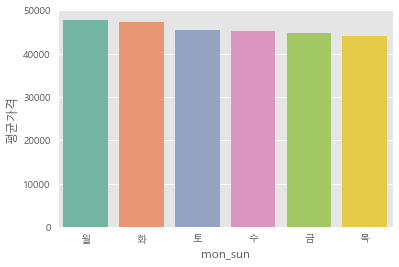

In [332]:
hot_ttop_copy = column_make(hot_ttop_copy,count_length_top)
display(hot_ttop_copy.head(2))
avg_price(hot_ttop_copy)

###  평균 가격대 분포 히스토그램

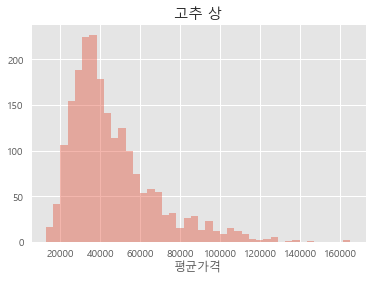

In [302]:
style.use('ggplot')
plt.title('고추 상')
sns.distplot(hot_ttop_copy['평균가격'],hist=True, kde=False, rug=False)

## 기후데이터 EDA

### 기후 데이터끼리 상관분석

,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),일교차
최저기온(°C),1.000000,0.917171,0.235968,-0.088248,0.384486,-0.196981,0.952273,-0.334879
최고기온(°C),0.917171,1.000000,0.092440,-0.167912,0.195569,0.089889,0.965839,0.068343
일강수량(mm),0.235968,0.092440,1.000000,0.018641,0.335289,-0.353999,0.130004,-0.372188
평균 풍속(m/s),-0.088248,-0.167912,0.018641,1.000000,-0.464868,0.116949,-0.097862,-0.176102
평균 상대습도(%),0.384486,0.195569,0.335289,-0.464868,1.000000,-0.641851,0.225750,-0.500160
합계 일조시간(hr),-0.196981,0.089889,-0.353999,0.116949,-0.641851,1.000000,0.024567,0.705707
평균 지면온도(°C),0.952273,0.965839,0.130004,-0.097862,0.225750,0.024567,1.000000,-0.100312
일교차,-0.334879,0.068343,-0.372188,-0.176102,-0.500160,0.705707,-0.100312,1.000000


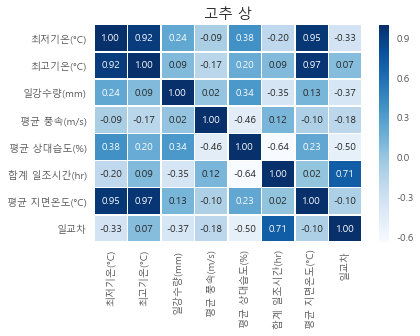

In [364]:
 weather(hot_ttop_copy,'고추 상')

### 평균가격과 각 기후데이터 산점도 그래프 , 반입량과 각 기후데이터 산점도 그래프

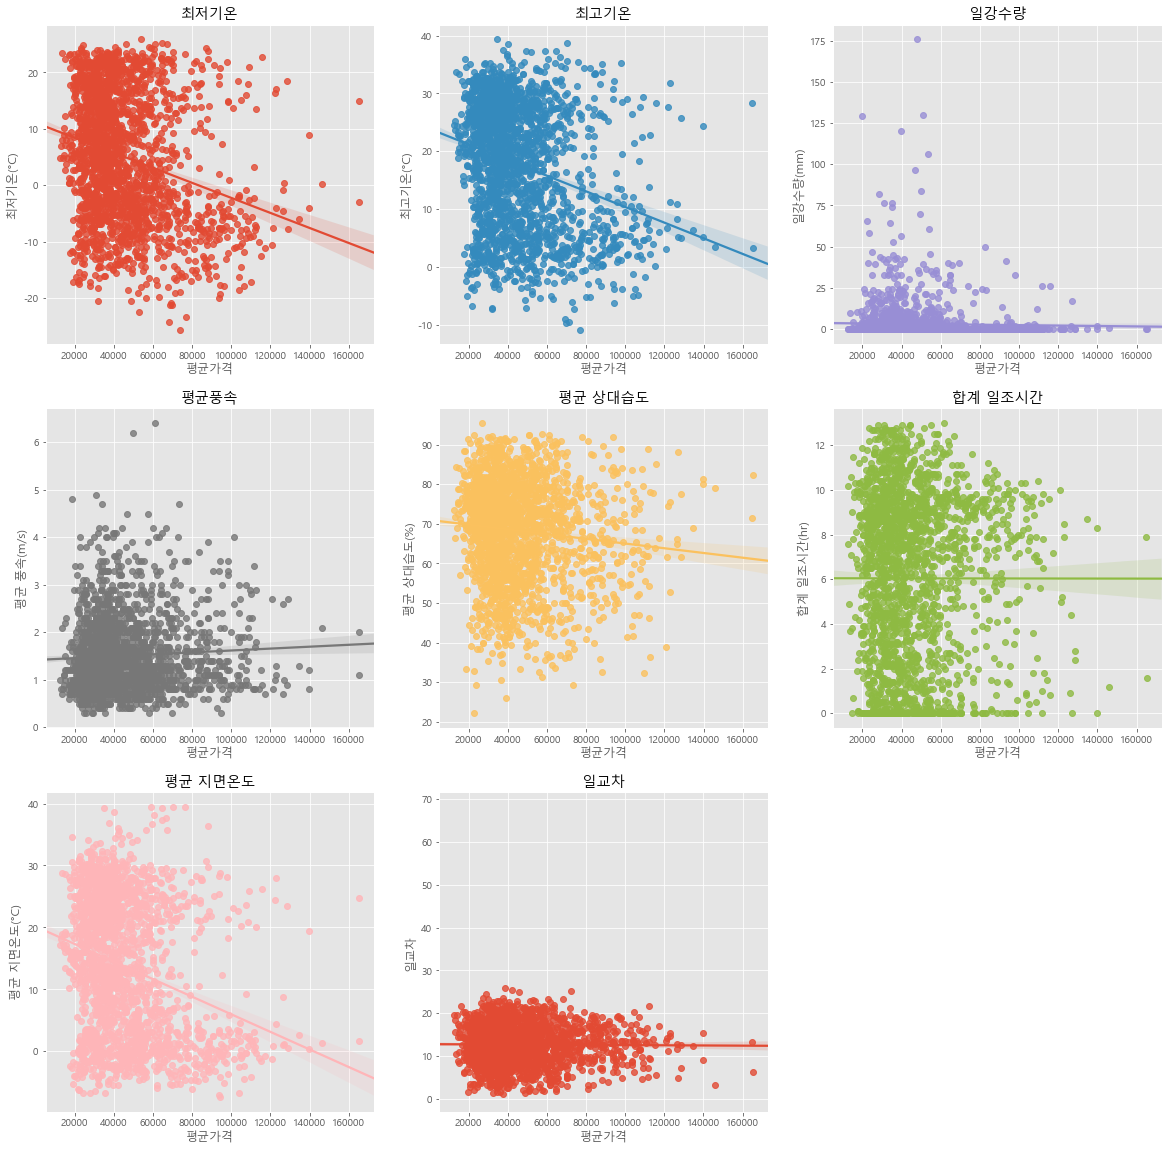

In [217]:
scatter_gtaph('평균가격',hot_ttop_copy)
scatter_gtaph('반입량',hot_ttop_copy)

### 반입량과 평균가격 산점도 그래프 

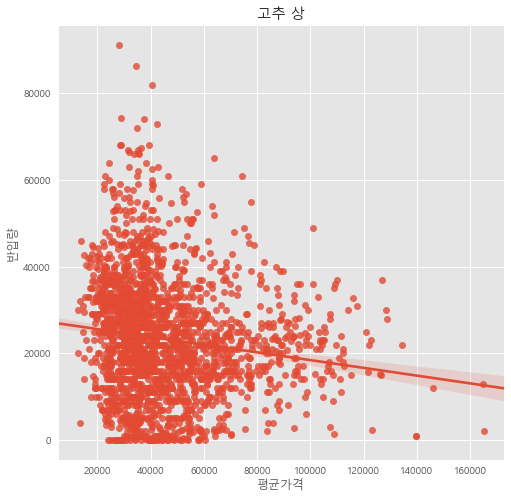

In [305]:
fig = plt.figure(figsize=(8,8))
style.use('ggplot')
plt.title('고추 상')
sns.regplot(x='평균가격',y='반입량',data=hot_ttop_copy)
plt.show()

### 반입량과 평균가격 추세 그래프  . 유가와 평균가격 추세 그래프 

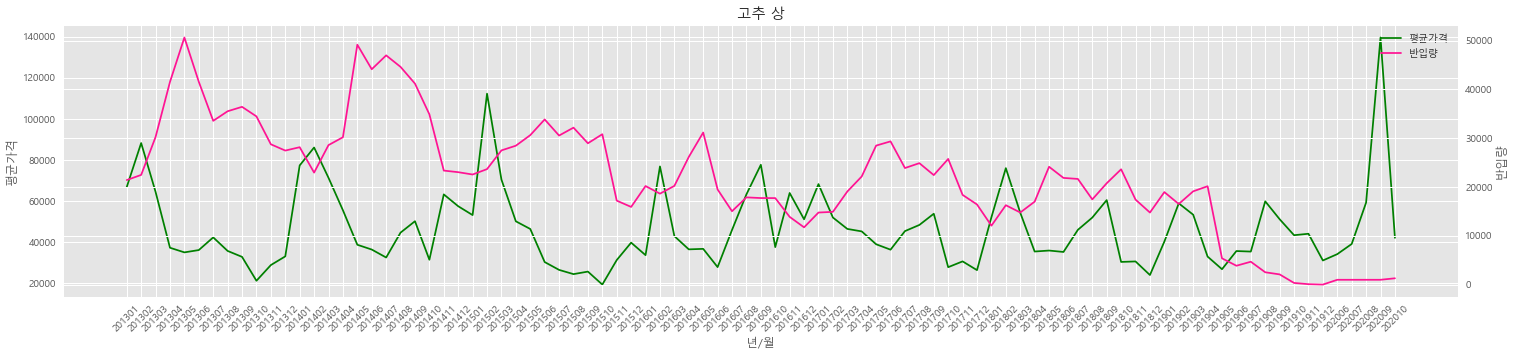

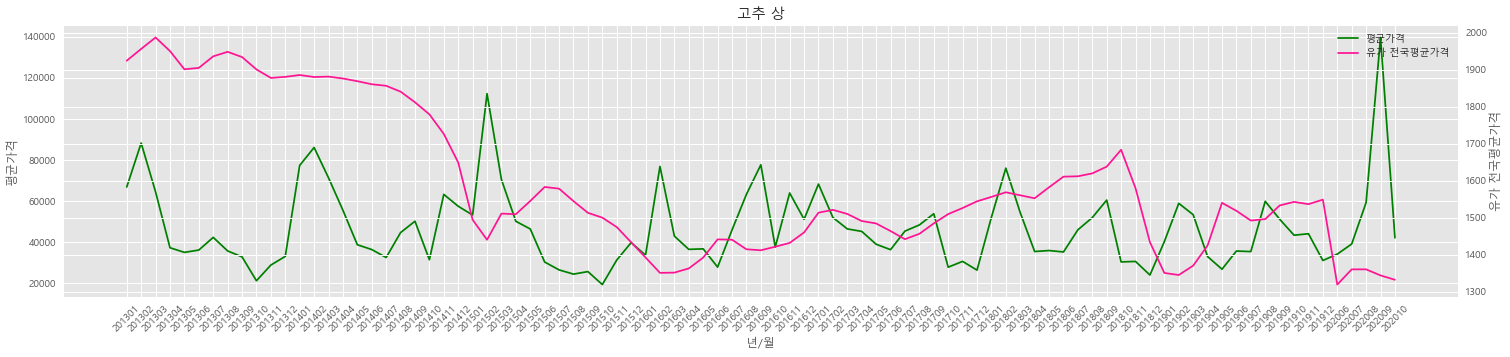

In [354]:
line_avg_price(hot_ttop_copy, '반입량', '고추 상')
line_avg_price(hot_ttop_copy, '유가 전국평균가격', '고추 상')

# 고추 특

### 파일 불러오기 , 컬럼 데이터 개수

In [356]:
hot_toptop, count_length_toptop = file_start('hotpapper_toptop.xlsx')

2094


### 요일별 채소 평균가격

,일자,반입량,평균가격,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),유가 전국평균가격,str_date,mon_sun,일교차,month
0,2013-01-03,45380,82730,-23.4,-10.9,0.0,1.4,70.6,8.9,-2.9,1927.557647,2013-01-03,목,12.5,201301
1,2013-01-04,22930,81353,-25.6,-7.3,0.0,0.6,71.0,8.9,-3.5,1928.578235,2013-01-04,금,18.3,201301


,mon_sun,평균가격
0,화,58180.726496
1,월,57733.461756
2,토,56150.928994
3,수,55622.161932
4,금,55173.382857
5,목,53839.328571


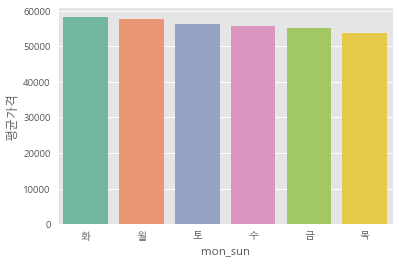

In [357]:
hot_toptop_copy = column_make(hot_toptop_copy,count_length_toptop)
display(hot_toptop_copy.head(2))
avg_price(hot_toptop_copy)

### 평균 가격대 분포 히스토그램

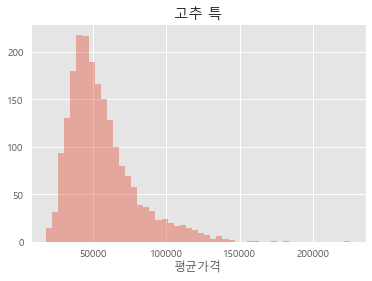

In [336]:
style.use('ggplot')
plt.title('고추 특')
sns.distplot(hot_toptop_copy['평균가격'],hist=True, kde=False, rug=False)

## 기후데이터 EDA

### 기후 데이터끼리 상관분석

,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),일교차
최저기온(°C),1.000000,0.917171,0.235968,-0.088248,0.384486,-0.196981,0.952273,-0.334879
최고기온(°C),0.917171,1.000000,0.092440,-0.167912,0.195569,0.089889,0.965839,0.068343
일강수량(mm),0.235968,0.092440,1.000000,0.018641,0.335289,-0.353999,0.130004,-0.372188
평균 풍속(m/s),-0.088248,-0.167912,0.018641,1.000000,-0.464868,0.116949,-0.097862,-0.176102
평균 상대습도(%),0.384486,0.195569,0.335289,-0.464868,1.000000,-0.641851,0.225750,-0.500160
합계 일조시간(hr),-0.196981,0.089889,-0.353999,0.116949,-0.641851,1.000000,0.024567,0.705707
평균 지면온도(°C),0.952273,0.965839,0.130004,-0.097862,0.225750,0.024567,1.000000,-0.100312
일교차,-0.334879,0.068343,-0.372188,-0.176102,-0.500160,0.705707,-0.100312,1.000000


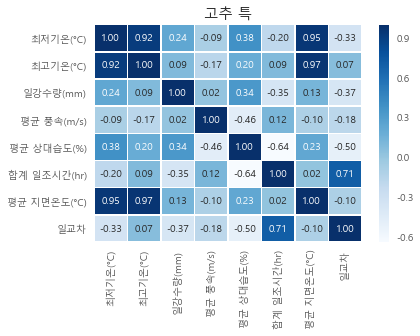

In [365]:
 weather(hot_toptop_copy,'고추 특')

### 평균가격과 각 기후데이터 산점도 그래프 , 반입량과 각 기후데이터 산점도 그래프

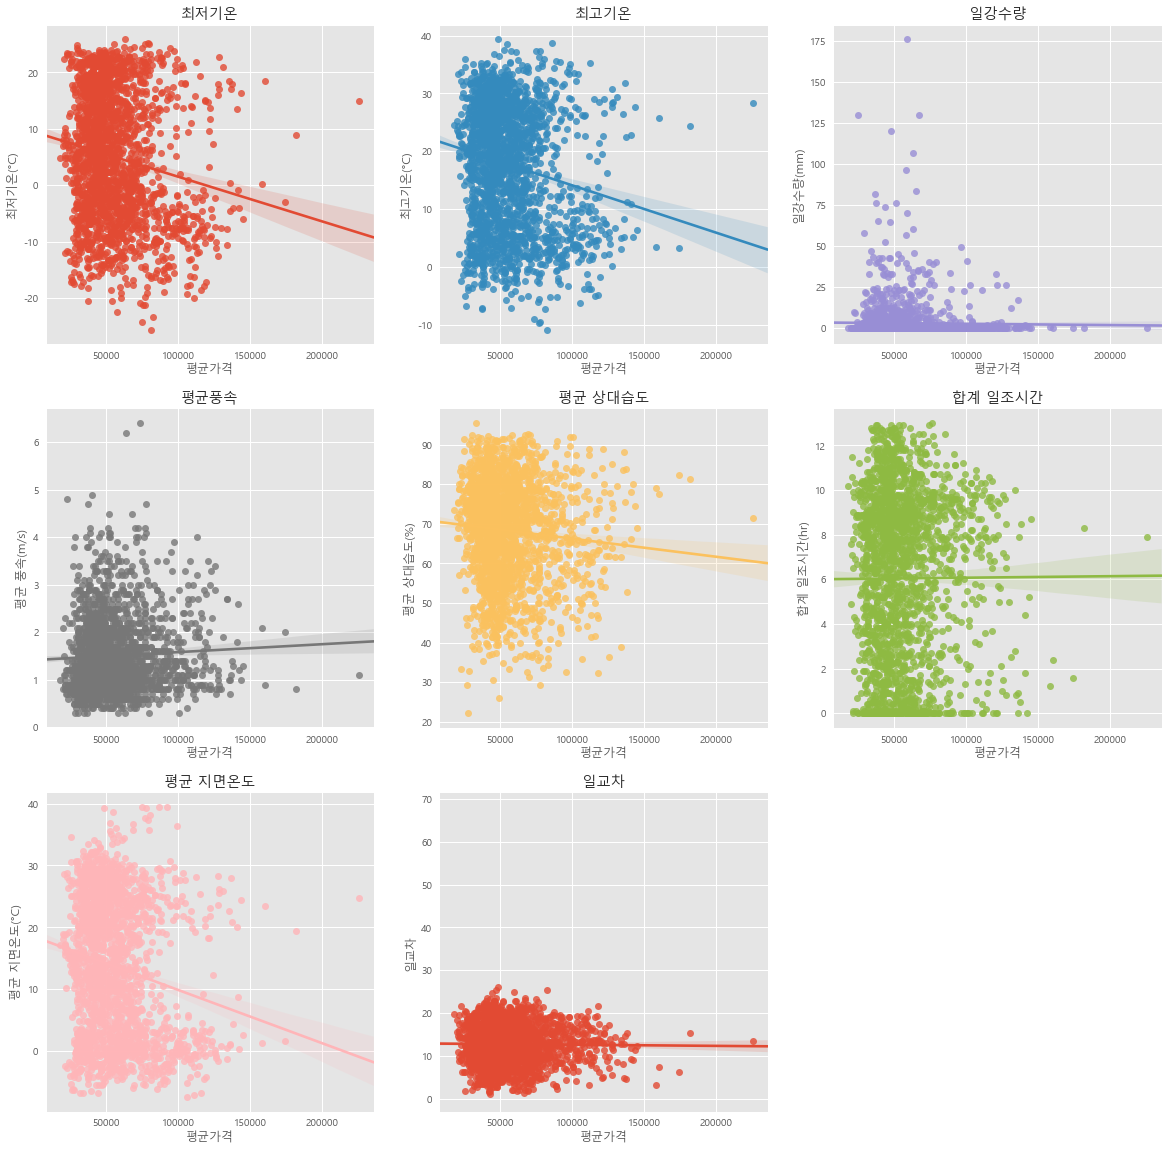

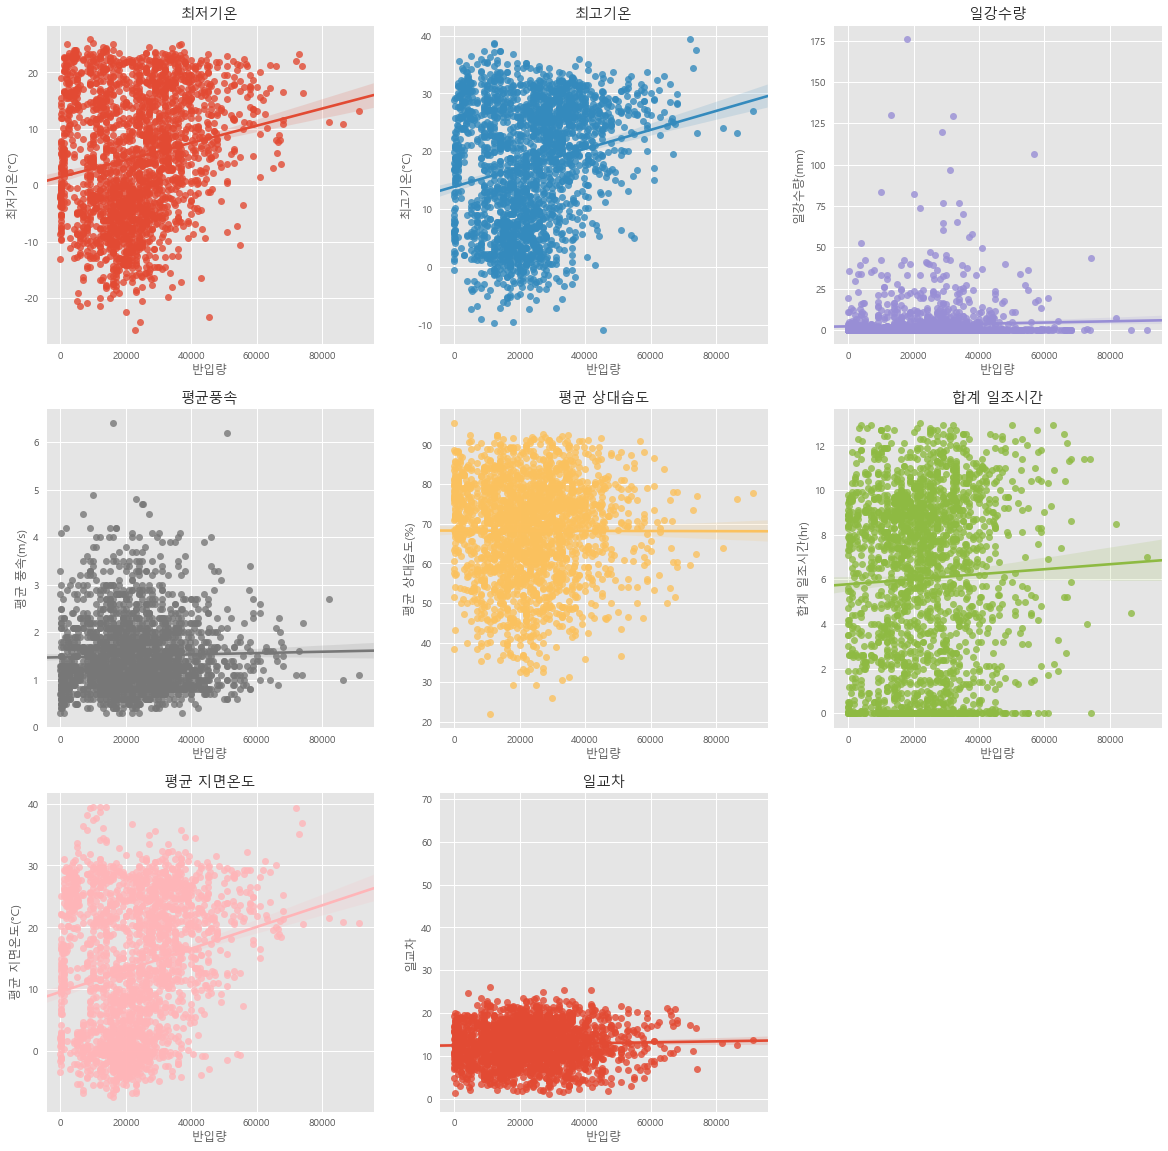

In [359]:
scatter_gtaph('평균가격',hot_toptop_copy)
scatter_gtaph('반입량',hot_toptop_copy)

### 반입량과 평균가격 산점도 그래프

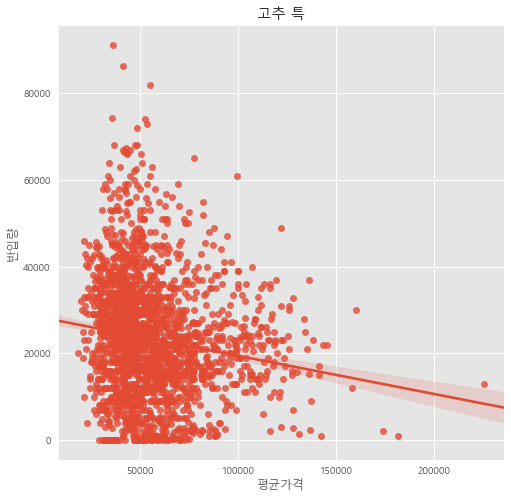

In [358]:
fig = plt.figure(figsize=(8,8))
style.use('ggplot')
plt.title('고추 특')
sns.regplot(x='평균가격',y='반입량',data=hot_toptop_copy)
plt.show()

### 반입량과 평균가격 추세 그래프 . 유가와 평균가격 추세 그래프

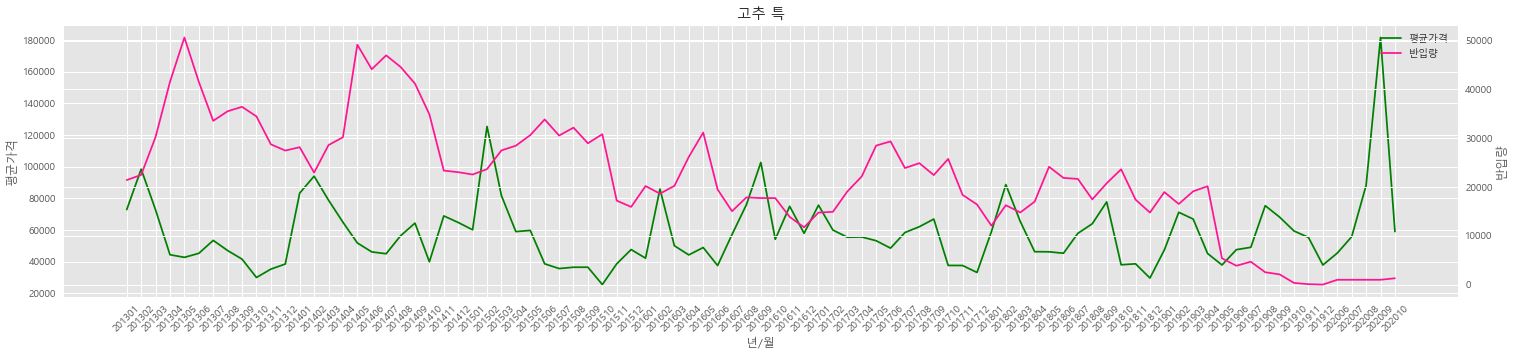

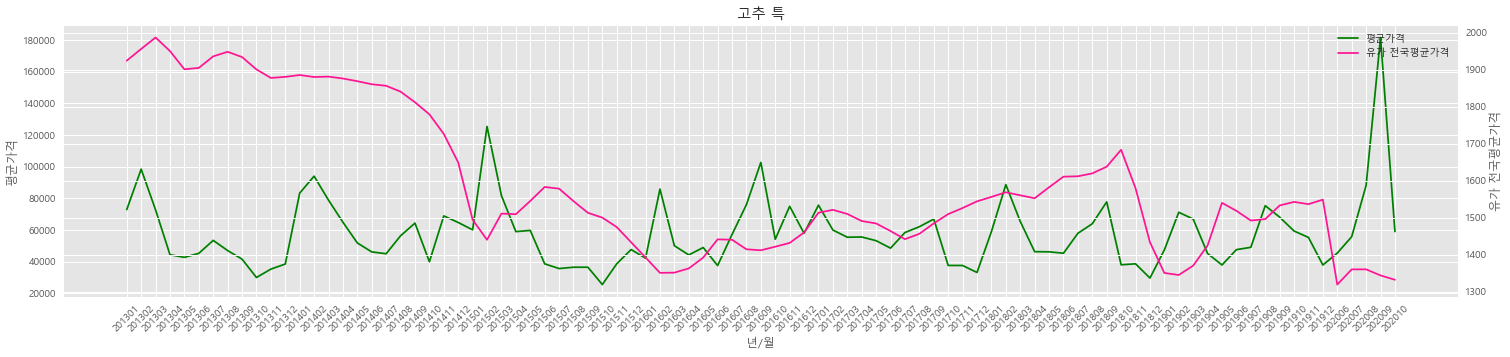

In [353]:
line_avg_price(hot_toptop_copy, '반입량', '고추 특')
line_avg_price(hot_toptop_copy, '유가 전국평균가격', '고추 특')